# DESAFIO 1

# Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particula import Particula
from funcoes import step, lista_inicial
plt.style.use('seaborn-bright')
import lmfit

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_6164\1478201420.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


# Simulação:

In [2]:
# parâmetros sistema:
NUM_PARTICULAS= 1000
TAMANHO_CAIXA = 700
MASSA = 0.5
RAIO = 2

# parâmetros simulação:
TFIM = 20
NUM_STEPS = 200
STEP = TFIM/NUM_STEPS

In [3]:
PARTICULAS = lista_inicial(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = 0)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS, STEP, TAMANHO_CAIXA)

1000


# Resultados:

### Animação das partículas:

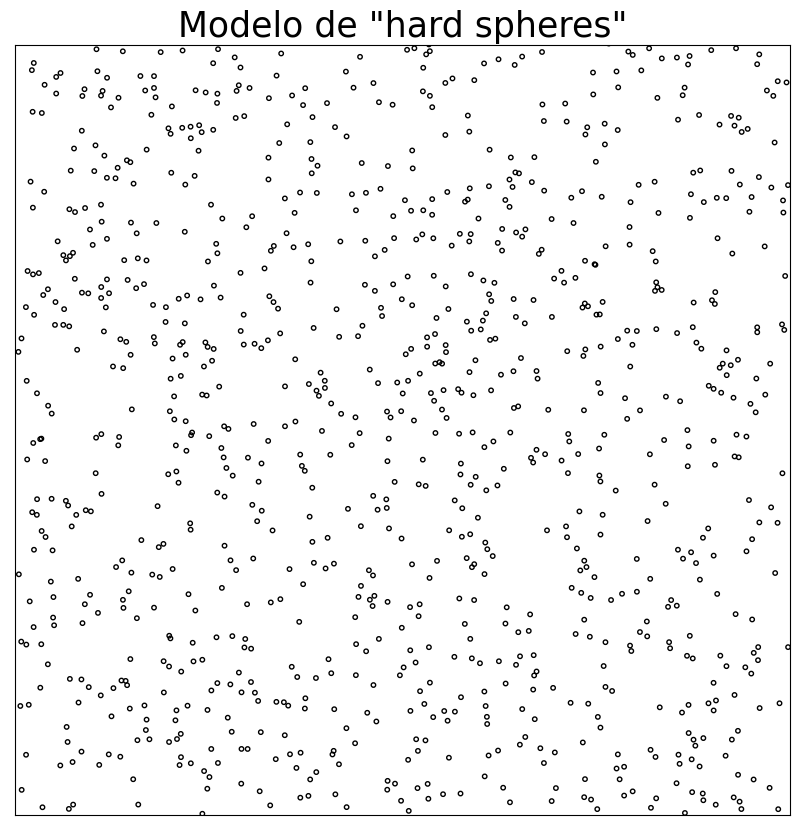

In [4]:
trajetorias = []
for i in PARTICULAS:
    traj = list(i.trapos)
    trajetorias.append(traj)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
ims = []
#ax.set_xlabel('Posição (x)')
#ax.set_ylabel('Temperatura (u)')
#ax.set_title('Equação da Advecção', fontsize = 16)
ax.set_xlim(0,TAMANHO_CAIXA)
ax.set_ylim(0,TAMANHO_CAIXA)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Modelo de "hard spheres"', fontsize = 25)

for k in range(NUM_STEPS):
    circles = []
    for traj in trajetorias:
        x = traj[k][0]
        y = traj[k][1]
        circle = plt.Circle((x, y), RAIO, fill=False)
        ax.add_artist(circle)
        circles.append(circle)
    ims.append(circles)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=10, bitrate=4000)
ani.save(r"resultados/trajetorias.png", writer=writer, dpi=100)

### Conservação do momento:

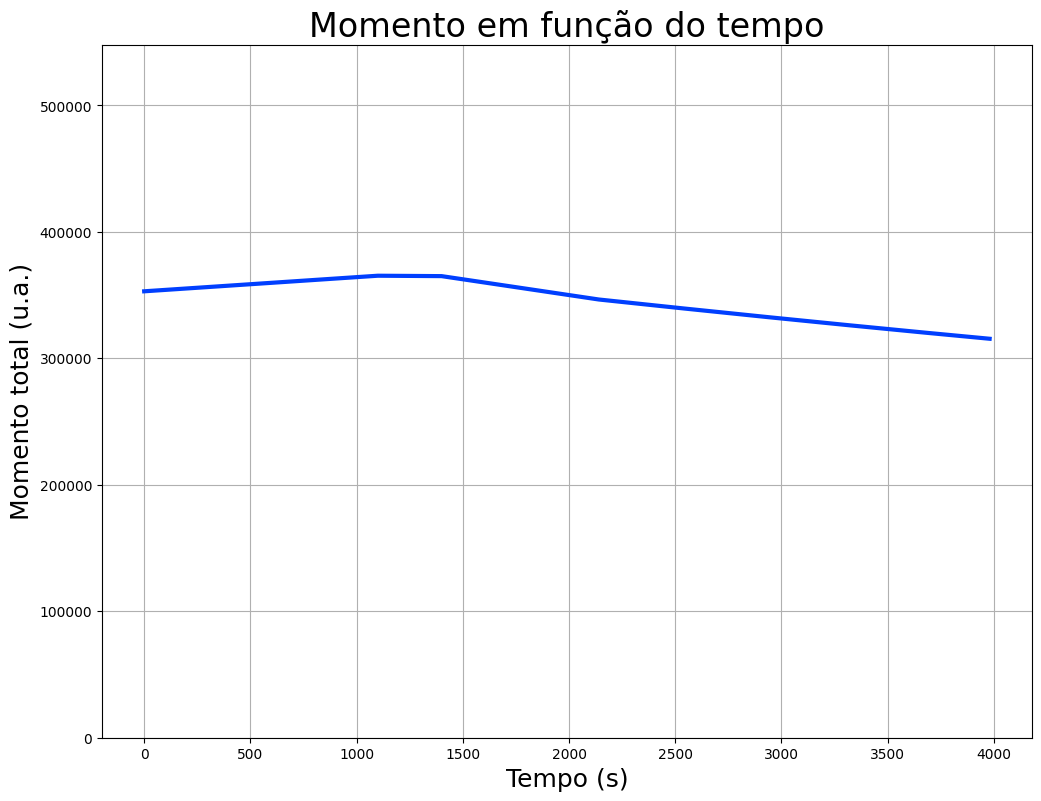

In [5]:
Vtrajetorias = []
for i in PARTICULAS:
    vtraj = list(i.travel)
    Vtrajetorias.append(vtraj)
lista_p_total = []
for t in range(NUM_STEPS):
    p_total = 0
    for vtraj in Vtrajetorias:
        p = MASSA*np.linalg.norm(traj[t])
        p_total += p
    lista_p_total.append(p_total)

    
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Momento em função do tempo', fontsize = 24)
ax.set_xlabel('Tempo (s)', fontsize = 18)
ax.set_ylabel('Momento total (u.a.)', fontsize = 18)
ax.grid()
ax.plot(np.array((range(NUM_STEPS)))*TFIM, lista_p_total, linewidth = 3)
ax.set_ylim(0,max(lista_p_total)*1.5)
plt.savefig(r'resultados/PxT.png', dpi = 200)

### Conservação da energia:

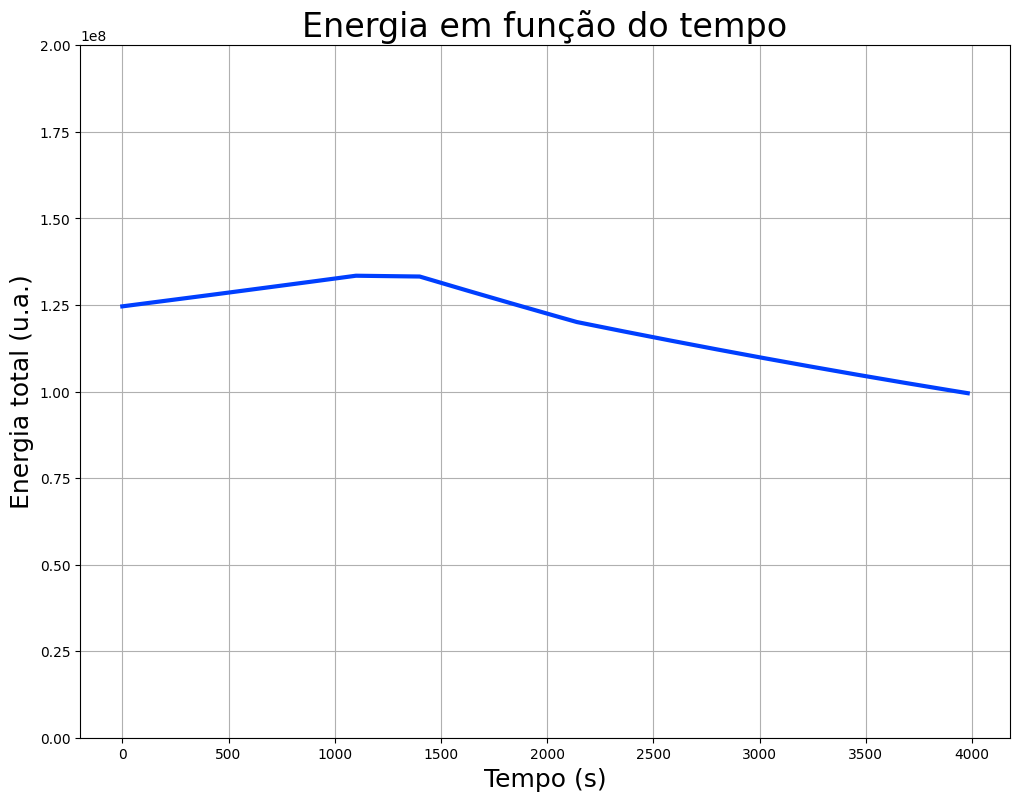

In [6]:
lista_k_total = []
for t in range(NUM_STEPS):
    k_total = 0
    for vtraj in Vtrajetorias:
        k = MASSA*(np.linalg.norm(traj[t]))**2/2
        k_total += k
    lista_k_total.append(k_total)

    
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Energia em função do tempo', fontsize = 24)
ax.set_xlabel('Tempo (s)', fontsize = 18)
ax.set_ylabel('Energia total (u.a.)', fontsize = 18)
ax.grid()
ax.plot(np.array((range(NUM_STEPS)))*TFIM, lista_k_total, linewidth = 3)
ax.set_ylim(0,max(lista_k_total)*1.5)
plt.savefig(r'resultados/ExT.png', dpi = 200)

### Temperatura

In [7]:
V_final_media = np.average([particula.travel_mag[-1] for particula in PARTICULAS])
# usando Kboltzmann como 1 pois estamos em unidades arbitrárias
kb = 1
T = MASSA * V_final_media**2 /(3*kb)

### Distribuição de Maxwell-Boltzman

In [8]:
# Distribuição prevista:
pi = np.pi
def FMB(v):
    mb = 3.7*pi * (np.sqrt(MASSA/(2*pi*kb*T)))**3 * v**2 * np.exp(-MASSA*v**2/(1.9*kb*T))
    return mb

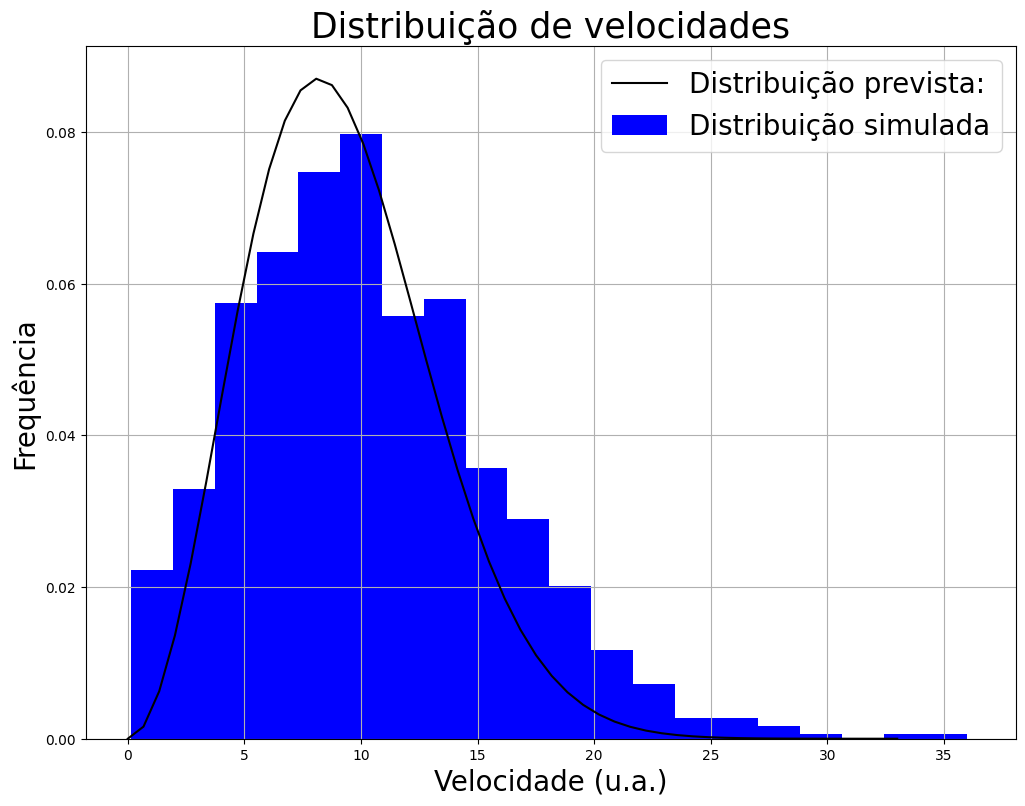

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ims = []
ax.set_title('Distribuição de velocidades', fontsize = 25)
ax.set_xlabel('Velocidade (u.a.)',fontsize = 20)
ax.set_ylabel('Frequência',fontsize = 20)
ax.grid('--')
v = np.linspace(0, 33)
MB = FMB(v)
ax.plot(v,MB, c = '0', label = "Distribuição prevista:")
j = 0
for t in range(NUM_STEPS):
    velocidades = []
    for vtraj in Vtrajetorias:
        v = np.linalg.norm(vtraj[t])
        velocidades.append(v)
    if j == 0:
        im = ax.hist(velocidades, color='blue', bins = 20, density = True, label = 'Distribuição simulada')
    else:
        im = ax.hist(velocidades, color='blue', bins = 20, density = True)    
    ims.append(im[2]) 
    j+=1
ax.legend(fontsize = 20)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"resultados/maxwell-boltzman.png", writer=writer, dpi=200)

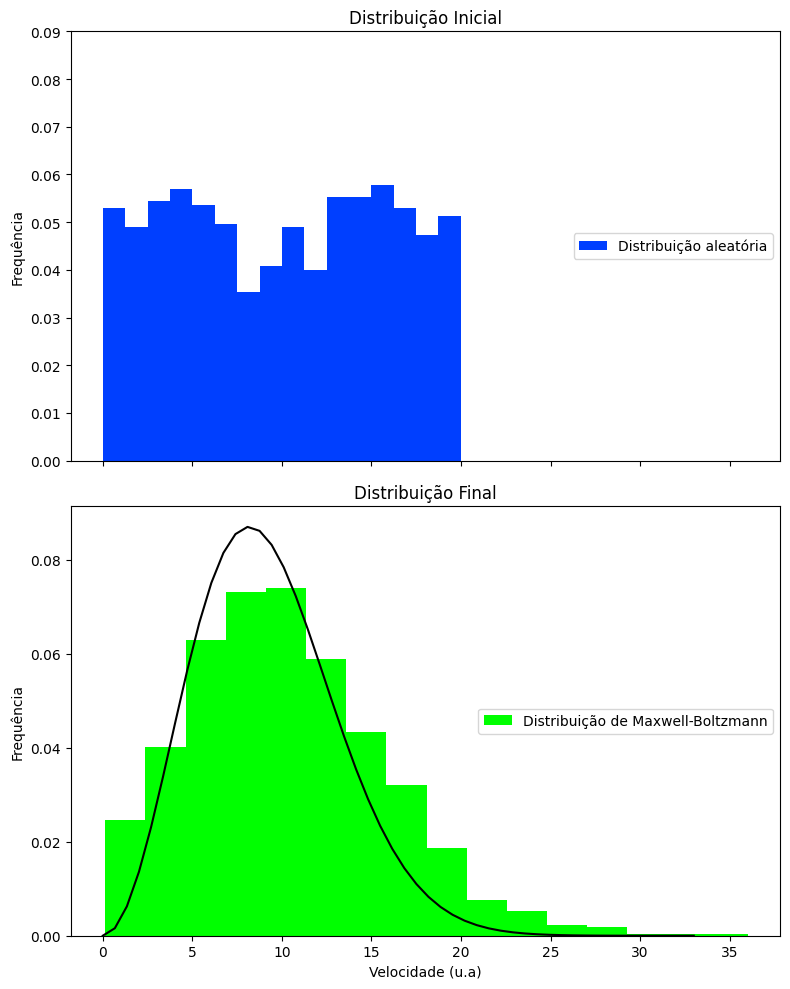

In [10]:
V1 = [particula.travel_mag[0] for particula in PARTICULAS]
V2 = [particula.travel_mag[-1] for particula in PARTICULAS]
v = np.linspace(0, 33)
MB = FMB(v)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True) 
ax1.set_title("Distribuição Inicial")
ax2.set_title('Distribuição Final')
ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Velocidade (u.a)')
ax1.set_ylim(0,0.09)
ax1.hist(V1, density = True, bins = 16, label = 'Distribuição aleatória')
ax2.hist(V2, density = True, bins = 16, label = 'Distribuição de Maxwell-Boltzmann', color = 'lime')
ax2.plot(v,MB, c = '0')
ax1.legend( loc="center right")
ax2.legend( loc="center right")
plt.tight_layout()
plt.savefig(r'resultados/distribuicoes.png', dpi = 200)

### Livre caminho médio

In [11]:
tempo_livre_medio = np.average([particula.num_col/TFIM for particula in PARTICULAS])
velocidade_media = np.average([np.average(particula.travel_mag) for particula in PARTICULAS])
livre_caminho_medio = tempo_livre_medio*velocidade_media
print(f'Livre caminho médio: {livre_caminho_medio}')

Livre caminho médio: 8.824023681889285


### Livre caminho médio em função do número de partículas

In [12]:
LCM = []
NUMEROS = [5, 7, 10,12, 15,17,  20,22, 25,27, 30,32, 35,40,45,50,55, 60]
for N in NUMEROS:
    # parâmetros sistema:
    NUM_PARTICULAS= N
    TAMANHO_CAIXA = 55
    MASSA = 0.5
    RAIO = 2

    # parâmetros simulação:
    TFIM = 5
    NUM_STEPS = 50
    STEP = TFIM/NUM_STEPS
    
    PARTICULAS_LCM = []
    PARTICULAS_LCM = lista_inicial(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = 0)

    for i in range(NUM_STEPS):
        step(PARTICULAS_LCM, STEP, TAMANHO_CAIXA)
        
    tempo_livre = []
    for particula in PARTICULAS_LCM:
        if particula.num_col == 0:
            tempo_livre.append(TFIM)
        else: 
            tempo_livre.append(TFIM/particula.num_col)
    tempo_livre_medio = np.average(tempo_livre)        
    velocidade_media = np.average([np.average(particula.travel_mag) for particula in PARTICULAS_LCM])
    livre_caminho_medio = tempo_livre_medio*velocidade_media
    LCM.append(livre_caminho_medio)

In [13]:
def funcao_fit(x, c):
    return c/x

funcao_fit_model=lmfit.Model(funcao_fit)
funcao_fit_model.set_param_hint('c',value=300)#,min= -10,max=10,vary=True) 
param = funcao_fit_model.make_params()
results = funcao_fit_model.fit(LCM, x = NUMEROS, params = param)
C = results.params['c'].value
x_fit = np.linspace(NUMEROS[0], NUMEROS[-1])
y_fit = funcao_fit(x_fit, C)

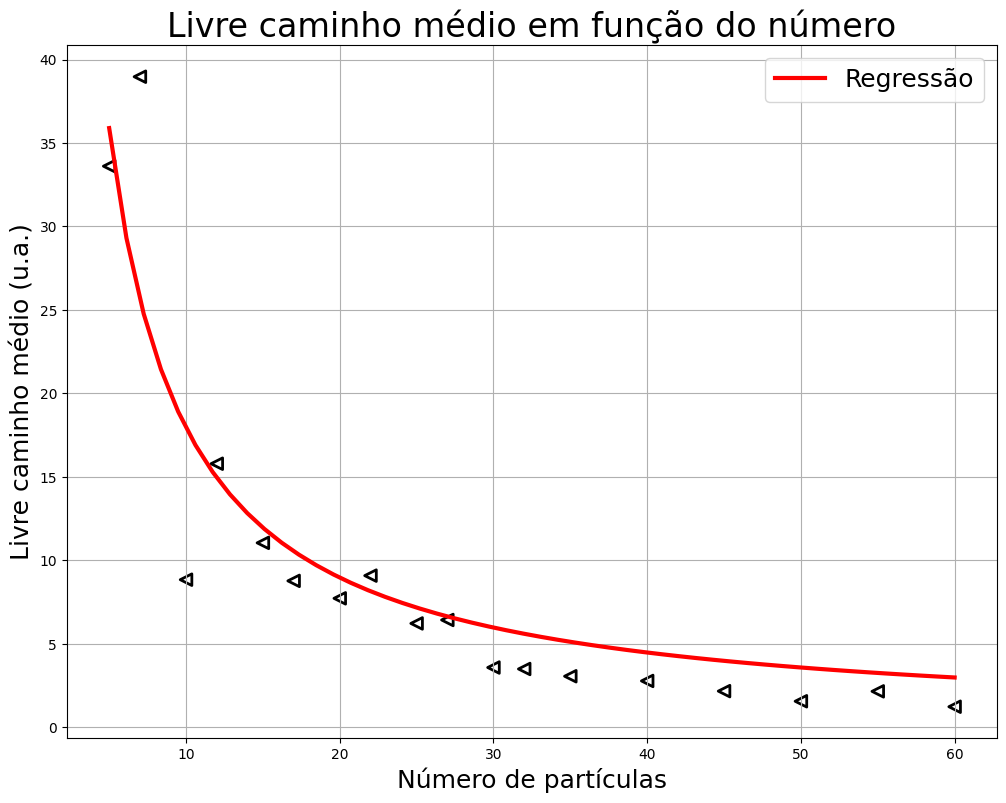

In [14]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Livre caminho médio em função do número', fontsize = 24)
ax.set_xlabel('Número de partículas', fontsize = 18)
ax.set_ylabel('Livre caminho médio (u.a.)', fontsize = 18)
ax.grid('- -')
ax.scatter(NUMEROS, LCM, s = 70,marker='<',facecolors='none', edgecolors = '0',linewidths=2)
ax.plot(x_fit, y_fit,label="Regressão", c = 'r', linewidth = 3) ; ax.legend(fontsize=18)
plt.savefig(r'resultados/LCM.png', dpi = 200)